In [1]:
#Step 1 - Importing all required libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#Step 2 - Creating a pandas dataframe named "df_311nyc" from the data available in csv format 

In [4]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_51a3837687ca424c88d81a9214afdc84 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='<replace_with_your_ibm_api_key_id>',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_51a3837687ca424c88d81a9214afdc84.get_object(Bucket='<replace_with_your_bucket_id>',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_311nyc = pd.read_csv(body, parse_dates = ['created_date'])
df_311nyc.head()


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-09-01 17:14:28,43695466,UNSANITARY CONDITION,11368.0,97-05 HORACE HARDING EXPRESSWAY,HORACE HARDING EXPRESSWAY,ADDRESS,Corona,The following complaint conditions are still o...,QUEENS,40.734899,-73.862526,NaN,RESIDENTIAL BUILDING,Open
1,2019-09-01 14:31:35,43697294,GENERAL,11233.0,110 ROCHESTER AVENUE,ROCHESTER AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.675350,-73.927728,NaN,RESIDENTIAL BUILDING,Open
2,2019-09-01 20:28:51,43701077,HEAT/HOT WATER,11225.0,271 HAWTHORNE STREET,HAWTHORNE STREET,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.657774,-73.951466,NaN,RESIDENTIAL BUILDING,Open
3,2019-09-01 11:54:18,43697359,WATER LEAK,10467.0,2714 WALLACE AVENUE,WALLACE AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.865959,-73.864435,NaN,RESIDENTIAL BUILDING,Open
4,2019-09-01 14:53:00,43694530,HEAT/HOT WATER,11225.0,271 HAWTHORNE STREET,HAWTHORNE STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.657774,-73.951466,NaN,RESIDENTIAL BUILDING,Open


In [5]:
#Step 3 - Analyzing the size of data using "shape" function

In [6]:
df_311nyc.shape

(5850244, 15)

In [7]:
#Step 4 - Analyzing the kind of data (column headers) using "columns" function

In [8]:
df_311nyc.columns

Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')

In [9]:
#Step 5 - Analyzing the type of data (column datatypes) using "dtypes" function

In [10]:
df_311nyc.dtypes

created_date              datetime64[ns]
unique_key                         int64
complaint_type                    object
incident_zip                     float64
incident_address                  object
street_name                       object
address_type                      object
city                              object
resolution_description            object
borough                           object
latitude                         float64
longitude                        float64
closed_date                       object
location_type                     object
status                            object
dtype: object

In [11]:
#Step 6 - To identify the top complaint type, considering column named "complaint_type" and checking different types of complaints using "unique" function

In [12]:
df_311nyc['complaint_type'].unique()

array(['UNSANITARY CONDITION', 'GENERAL', 'HEAT/HOT WATER', 'WATER LEAK',
       'PLUMBING', 'ELECTRIC', 'SAFETY', 'DOOR/WINDOW', 'PAINT/PLASTER',
       'FLOORING/STAIRS', 'ELEVATOR', 'APPLIANCE', 'General',
       'Unsanitary Condition', 'OUTSIDE BUILDING', 'Safety', 'Appliance',
       'Mold', 'Plumbing', 'HPD Literature Request', 'PAINT - PLASTER',
       'HEATING', 'GENERAL CONSTRUCTION', 'Outside Building', 'NONCONST',
       'CONSTRUCTION', 'AGENCY', 'STRUCTURAL', 'VACANT APARTMENT'],
      dtype=object)

In [13]:
#Step 7 - Checking if the column "complaint_type" contains any null or missing values

In [14]:
df_311nyc['complaint_type'].isnull().sum()

0

In [15]:
#Step 8 - Calculating the total frequency (occurance) of each complaint type using "value_counts()" function

In [16]:
df_311nyc['complaint_type'].value_counts()

HEAT/HOT WATER            1150569
HEATING                    887869
PLUMBING                   702389
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       435768
PAINT - PLASTER            361258
PAINT/PLASTER              340979
ELECTRIC                   303314
NONCONST                   260890
DOOR/WINDOW                199690
WATER LEAK                 187264
GENERAL                    146066
FLOORING/STAIRS            135257
APPLIANCE                  109605
HPD Literature Request      52830
SAFETY                      49975
OUTSIDE BUILDING             7018
ELEVATOR                     6421
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Mold                            1
Name: complain

In [17]:
#Preliminary Conclusion - From the results above, we can see that the top 2 complaints - 1) HEAT/HOT WATER and 2) HEATING (of similar nature) have highest number of occurance among others

In [18]:
#Step 9 - Plotting a bar chart for graphical analysis and support our conclusion

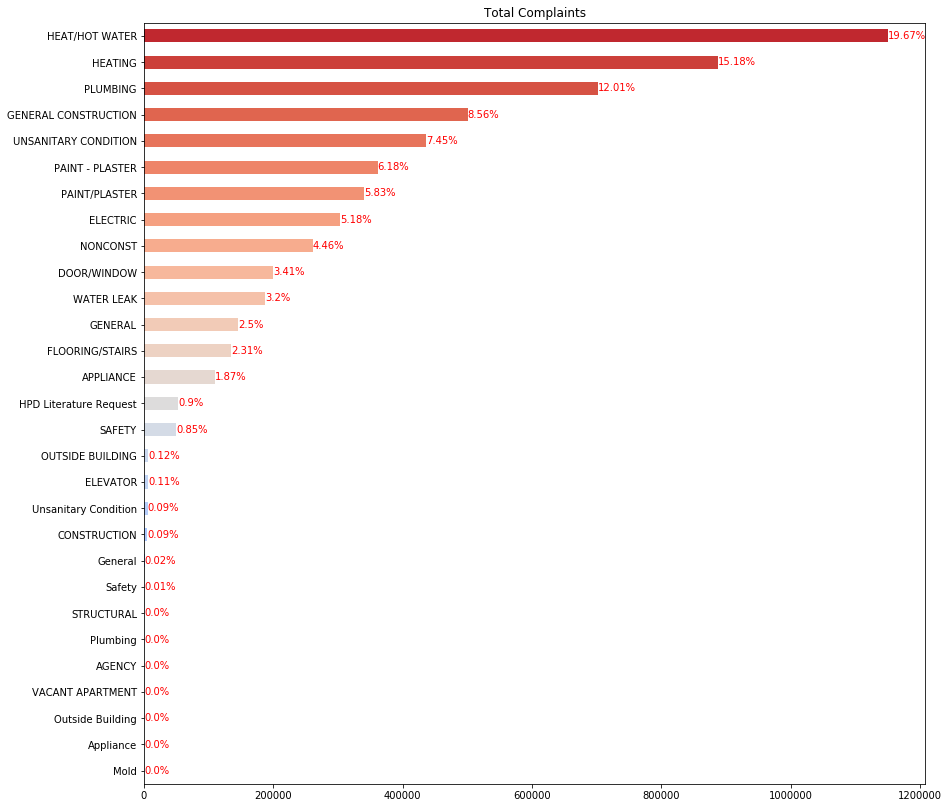

In [19]:
df_311nyc_complaint = df_311nyc['complaint_type'].value_counts()
df_311nyc_complaint.sort_values(ascending = True, inplace =True)
Total_complaint = df_311nyc_complaint.sum()

# Create the barh plot
df_311nyc_complaint.plot(kind = 'barh', figsize = (14,14), color=sns.color_palette("coolwarm", len(df_311nyc_complaint)))
plt.title('Total Complaints')

# Calculating percentage for total number of complaints per type
for index, value in enumerate(df_311nyc_complaint):
    label =  '{}%'.format(round((value/Total_complaint)*100, 2)) 
    plt.annotate(label, xy=(value, index-0.1), color='red')
    
plt.show()

In [20]:
#Final Conclusion: The top 2 complaints i.e. HEAT/HOT WATER & HEATING (of similar nature) approximately accounts for around 35% (highest) of total complaints made. Hence, in my opinion, the Department of Housing Preservation and Development should focus on these complaints first.